# Data visualization

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

warnings.filterwarnings('ignore')
from umap import UMAP

Define random seed to allow reproducibility

In [2]:
random_state = 42
np.random.seed(random_state)

Load training data

In [3]:
data_path = '../data/cleaned'

train = pd.read_csv(os.path.join(data_path, 'train.csv'), sep=';')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Columns: 4398 entries, ID to ENSG00000272168
dtypes: float64(4394), object(4)
memory usage: 21.5+ MB


Prepare data for visualization

In [4]:
mapping_to_binary = {
    'I': 'I-III',
    'II': 'I-III',
    'III': 'I-III',
    'IV': 'IV'
}

X_train = train.copy(deep=True)

y_train_multiclass = X_train.loc[:, 'Stage']
y_train_binary = X_train.loc[:, 'Stage'].map(mapping_to_binary)
X_train = X_train.loc[:, ~X_train.columns.isin(['ID', 'Sex', 'Age', 'Group', 'Stage'])]

print(f'Input dimensions: {X_train.shape}')

Input dimensions: (640, 4393)


Numerical features standardization

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

Initial dimensionality reduction using PCA

In [6]:
n_components = 50

pca = PCA(n_components=n_components, random_state=random_state)
X_train_pca = pca.fit_transform(X_train_scaled)

print(f'Input dimensions: {X_train_pca.shape}')

Input dimensions: (640, 50)


Define function for plotting reduced data

In [7]:
def plot_reduced_data(df_vis, method_prefix, title):
    binary_order = ['I-III', 'IV']
    multiclass_order = ['I', 'II', 'III', 'IV']

    plt.figure(figsize=(11, 6))
    sns.scatterplot(df_vis, x='x', y='y', hue='Stage multiclass', style='Stage binary', hue_order=multiclass_order, style_order=binary_order)
    plt.xlabel(f'{method_prefix}_1')
    plt.ylabel(f'{method_prefix}_2')
    plt.title(title, fontsize=20)
    plt.show()

## t-SNE

Training dataset projection to the 2D space using t-SNE method

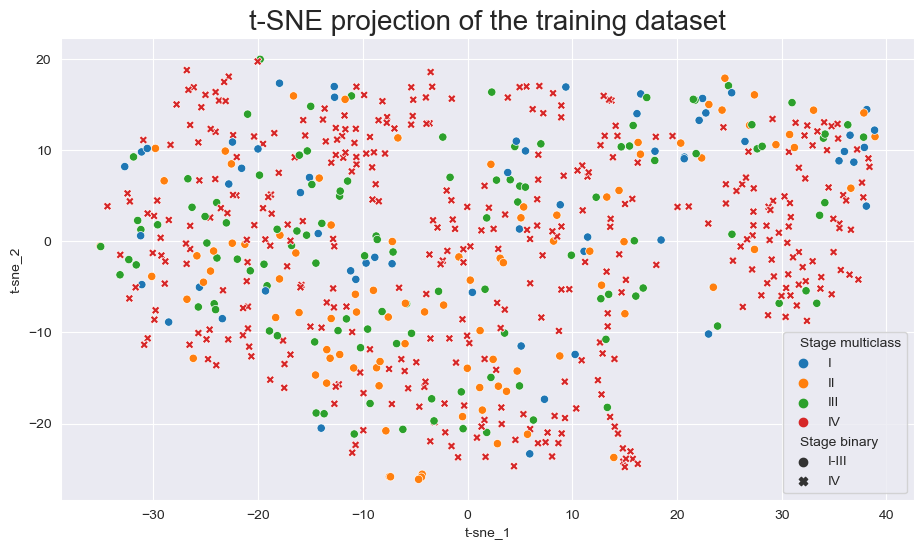

In [8]:
perplexity = int(np.sqrt(len(X_train_pca)))

tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
X_train_tsne = tsne.fit_transform(X_train_pca)

df_vis = pd.DataFrame(data={
    'x': X_train_tsne[:, 0],
    'y': X_train_tsne[:, 1],
    'Stage binary': y_train_binary,
    'Stage multiclass': y_train_multiclass
})

method_prefix = 't-sne'
title = 't-SNE projection of the training dataset'
plot_reduced_data(df_vis, method_prefix, title)

## UMAP

Training dataset projection to the 2D space using UMAP method

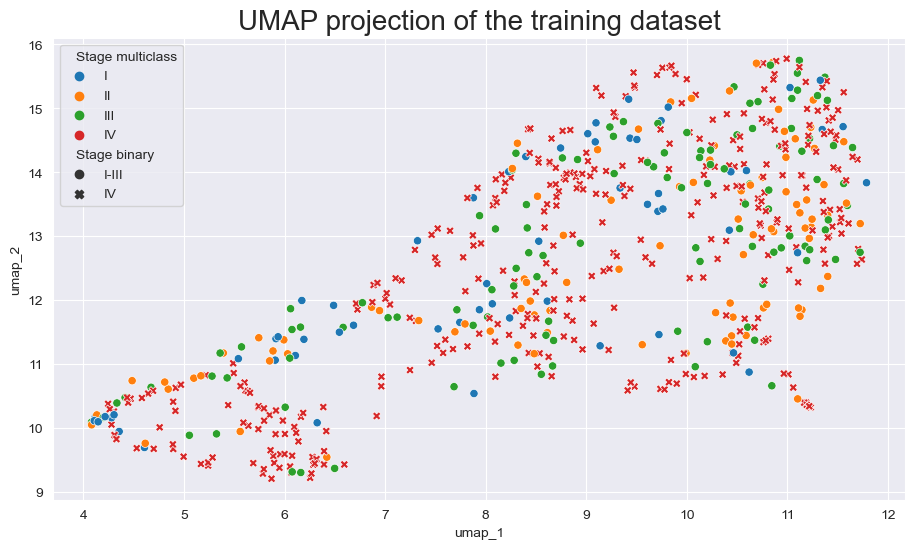

In [9]:
umap = UMAP(n_components=2, n_neighbors=15, random_state=random_state)

X_train_umap = umap.fit_transform(X_train_scaled)

df_vis = pd.DataFrame(data={
    'x': X_train_umap[:, 0],
    'y': X_train_umap[:, 1],
    'Stage binary': y_train_binary,
    'Stage multiclass': y_train_multiclass
})

method_prefix = 'umap'
title = 'UMAP projection of the training dataset'
plot_reduced_data(df_vis, method_prefix, title)